# TASK 3 : PIZZA SALES ANALYSIS

In [1]:
# Importing the required library
import pandas as pd

import matplotlib.pyplot as plt 

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Importing The Datasets

In [2]:
#Importing the datasets 

order_details = pd.read_csv(r"C:/Users/HP/Python Stuff/Pizza+Place+Sales/pizza_sales/order_details.csv", encoding='latin1')

orders = pd.read_csv(r"C:/Users/HP/Python Stuff/Pizza+Place+Sales/pizza_sales/orders.csv", encoding='latin1')

pizza_types = pd.read_csv(r"C:/Users/HP/Python Stuff/Pizza+Place+Sales/pizza_sales/pizza_types.csv", encoding='latin1')

pizzas = pd.read_csv(r"C:/Users/HP/Python Stuff/Pizza+Place+Sales/pizza_sales/pizzas.csv", encoding='latin1')

## Previewing The Datasets

In [3]:
# Before merging the datasets, we'll take a quick look at the first 5 rows of each file using the '.head()' function. 
#This helps us understand the structure of each datasets and confirm which columns we can use to merge them.

In [4]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [6]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [7]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


## Cleaning Each Dataset

### 1. Cleaning order_details dataset

In [14]:
# Cleaning the order_details dataset

order_details.isna().sum() # to check for null values

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [15]:
order_details.duplicated().sum() # to check for duplicates

0

In [16]:
order_details.info() # gives an overview of datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
order_details.describe() # quick summary of the statistical properties

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [13]:
# Data cleaning is complete for this dataset
# After performing checks such as .isna().sum(), .duplicated.sum(), .info() and .describe()
# I've found that there are no missing values,no duplicates,  appropriate dtypes 
# Outlier analysis was skipped for the quantity column because the values (ranging from 1-4) are all realistic and expected in the context of pizza ordering
# This data is ready for merging with other datasets

### 2. Cleaning orders dataset

In [19]:
# Cleaning the orders dataset

orders.isna().sum() # to check for null values

order_id    0
date        0
time        0
dtype: int64

In [20]:
orders.duplicated().sum() # to check for duplicates

0

In [21]:
orders.info() # gives an overview of datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [5]:
# Converting date to a datetime dtype

orders["date"] = pd.to_datetime(orders["date"])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 500.5+ KB


In [6]:
# Converting time to a datetime dtype
orders["time"] = pd.to_datetime(orders["time"])

orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


In [10]:
# Data cleaning is complete for this dataset
# After performing checks such as .isna().sum(), .duplicated.sum(), and .info()
# I've found that there are no missing values,no duplicates, we converted the dtypes to the right ones
# And no outliers(because there is no numerical column)
# This data is ready for merging with other datasets

### 3. Cleaning pizzas dataset

In [7]:
# Cleaning the pizzas dataset

pizzas.isna().sum() # to check for null values

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [8]:
pizzas.duplicated().sum() # to check for duplicates

0

In [9]:
pizzas.info() # gives an overview of datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [11]:
pizzas.describe() # quick summary of the statistical properties

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [12]:
# Data cleaning is complete for this dataset
# After performing checks such as .isna().sum(), .duplicated.sum(), .info() and .describe()
# I've found that there are no missing values,no duplicates, appropriate dtypes 
# After evaluating the price column, I observed that the maximum value 35.95 corresponds to an order with 4 pizzas, so it isn't an outlier in this context
# This data is ready for merging with other datasets

### 4. Cleaning pizza_types dataset

In [9]:
# Cleaning the pizza_types dataset

pizza_types.isna().sum() # to check for null values

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [10]:
pizza_types.duplicated().sum() # to check for duplicates

0

In [11]:
pizza_types.info() # gives an overview of datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [14]:
# Data cleaning is complete for this dataset
# After performing checks such as .isna().sum(), .duplicated.sum(), and .info()
# I've found that there are no missing values,no duplicates,and  appropriate dtypes
# And no outliers(because there is no numerical column)
# This data is ready for merging with other datasets

### 5. Clean merge columns : make lowercase and strip whitespace for consistency before merging

In [15]:
order_details["pizza_id"] = order_details["pizza_id"].str.lower().str.strip()
pizzas["pizza_id"] = pizzas["pizza_id"].str.lower().str.strip()

pizzas["pizza_type_id"] = pizzas["pizza_type_id"].str.lower().str.strip()
pizza_types["pizza_type_id"] = pizza_types["pizza_type_id"].str.lower().str.strip()

## Merging The Datasets

In [9]:
# Merge 1: order_details + orders on order_id using left join to keep all order details records

df1 = pd.merge(order_details, orders, on = "order_id", how = "left")

df1.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [17]:
# Check for unmatched pizza_ids before merging
unmatched_pizza_ids = df1[df1["pizza_id"].isin(pizzas["pizza_id"]) == False]

unmatched_pizza_ids

,order_details_id,order_id,pizza_id,quantity,date,time


In [18]:
# The output of the cell above means all the pizza ids in df1 are all found in the pizza id in the pizza table.
# so we would have no problem with merging.

In [10]:
# Merge 2: df1 + pizzas on pizza_id using left join to keep all pizza id records on df1

df2 = pd.merge(df1, pizzas, on = "pizza_id", how = "left")

df2.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00


In [21]:
# Check for unmatched pizza_ids before merging
unmatched_pizza_type_ids = df2[df2["pizza_type_id"].isin(pizzas["pizza_type_id"]) == False]

unmatched_pizza_type_ids

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price


In [33]:
# The output of the cell above means all the pizza type ids in df2 are all found in the pizza id in the pizza type table.
# so we would have no problem with merging.

In [11]:
# Merge 3: df2 + pizza_types on pizza_type_id using left join to keep all pizza type id records on df2

df3 = pd.merge(df2, pizza_types, on = "pizza_type_id", how = "left")

df3.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [25]:
# Overview of df3

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [23]:
# Converting date and time to a datetime dtype

df3["date"] = pd.to_datetime(df3["date"])

df3["time"] = pd.to_datetime(df3["time"])

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  revenue           48620 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


In [27]:
df3.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [28]:
df3.duplicated().sum()

0

## Analysis

### 1. Total Revenue/Sales

In [14]:
df3["revenue"] = df3["quantity"] * df3["price"]

total_revenue = df3["revenue"].sum()

total_revenue

817860.05

### 2. Total Quantity Sold

In [30]:
total_quantity = df3["quantity"].sum()

total_quantity

49574

### 3. Total Orders

In [31]:
total_orders = df3["order_id"].nunique()

total_orders

21350

### 4. Number of Pizza Types They Sell

In [32]:
total_pizza_types = df3["pizza_type_id"].nunique()

total_pizza_types

32

### 5. Average Price of Pizzas

In [34]:
average_price = df3["price"].mean()

average_price

16.494132044426163

### 6. Peak Hours of Sales

In [25]:
# Extracting the hour of the order from date
df3["order_hour"] = df3["time"].dt.hour

# Count sales by hour
peak_hours = df3.groupby("order_hour")["quantity"].sum().sort_values(ascending = False)

peak_hours

order_hour
12    6776
13    6413
18    5417
17    5211
19    4406
16    4239
14    3613
20    3534
15    3216
11    2728
21    2545
22    1386
23      68
10      18
9        4
Name: quantity, dtype: int64

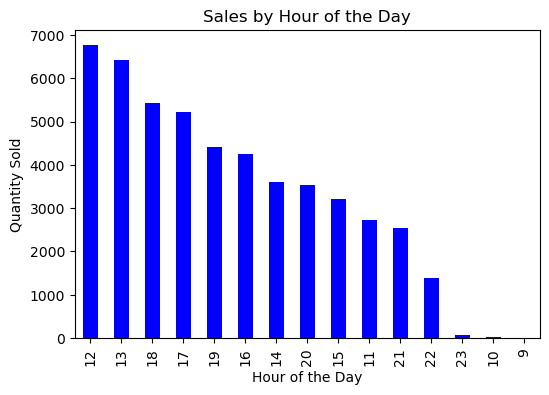

In [52]:
plt.figure(figsize = (6,4))
df3.groupby("order_hour")["quantity"].sum().sort_values(ascending = False).plot(kind = "bar", color = "blue")
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Quantity Sold")
plt.xticks(rotation = 90)
plt.show()

### 7. Total Sales Made on Each Day of The Week

In [49]:
# Extract the day of the week
df3["day_of_week"] = df3["date"].dt.day_name()

# Calculate total sales for each day of the week
sales_by_day = df3.groupby("day_of_week")["revenue"].sum().sort_values(ascending = False)

sales_by_day

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64

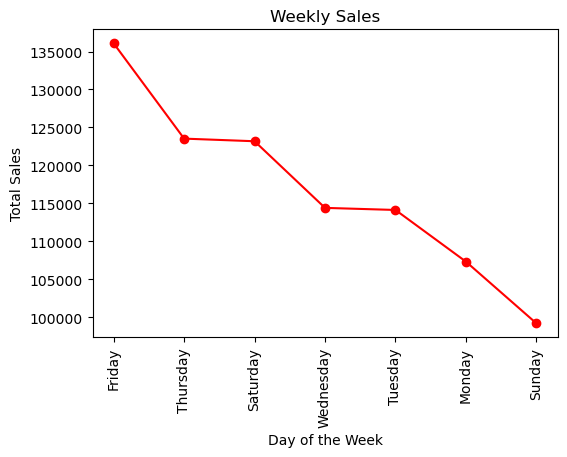

In [50]:
# What day of the week had the most sales?
# Friday

plt.figure(figsize = (6,4))
df3.groupby("day_of_week")["revenue"].sum().sort_values(ascending = False).plot(kind = "line", marker = "o", color = "red")
plt.title("Weekly Sales")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.xticks(rotation = 90)
plt.show()

### 8. Top 5 Bestselling Pizzas

In [45]:
top_pizzas = df3.groupby("pizza_type_id")["quantity"].sum().sort_values(ascending = False).head(5)

top_pizzas

pizza_type_id
classic_dlx    2453
bbq_ckn        2432
hawaiian       2422
pepperoni      2418
thai_ckn       2371
Name: quantity, dtype: int64

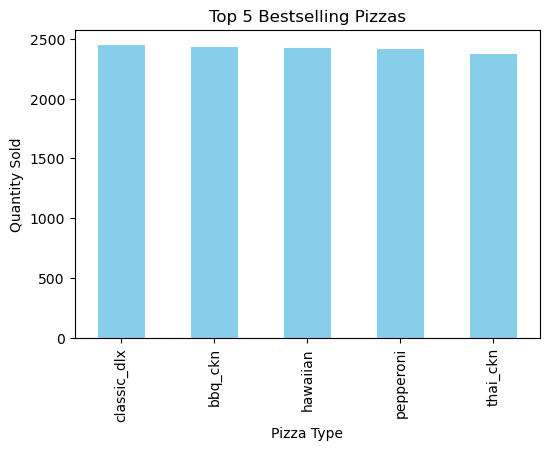

In [47]:
plt.figure(figsize = (6,4))
df3.groupby("pizza_type_id")["quantity"].sum().sort_values(ascending = False).head().plot(kind = "bar", color = "skyblue")
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Pizza Type")
plt.ylabel("Quantity Sold")
plt.xticks(rotation = 90)
plt.show()

### 9. Sales Made in Each Month - Trend Analysis

In [43]:
# Extract the month
df3["month"] = df3["date"].dt.month_name()

# Sales by month
sales_by_month = df3.groupby("month")["revenue"].sum().sort_values(ascending = False)

sales_by_month

month
July         72557.90
May          71402.75
March        70397.10
November     70395.35
January      69793.30
April        68736.80
August       68278.25
June         68230.20
February     65159.60
December     64701.15
September    64180.05
October      64027.60
Name: revenue, dtype: float64

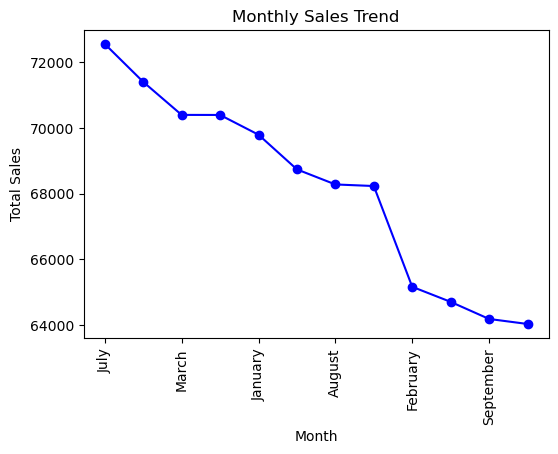

In [46]:
plt.figure(figsize = (6,4))
df3.groupby("month")["revenue"].sum().sort_values(ascending = False).plot(kind = "line", marker = "o", color = "blue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation = 90)
plt.show()

### 10. Pizza Types Not Doing Well on the Menu

In [58]:
low_sales_pizzas = df3.groupby("pizza_type_id")["quantity"].sum().sort_values()

low_sales_pizzas

pizza_type_id
brie_carre       490
mediterraneo     934
calabrese        937
spinach_supr     950
soppressata      961
spin_pesto       970
ckn_pesto        973
ital_veggie      981
ckn_alfredo      987
green_garden     997
pep_msh_pep     1359
five_cheese     1409
the_greek       1420
ital_cpcllo     1438
peppr_salami    1446
spinach_fet     1446
prsc_argla      1457
napolitana      1464
mexicana        1484
veggie_veg      1526
ital_supr       1884
four_cheese     1902
big_meat        1914
southw_ckn      1917
spicy_ital      1924
sicilian        1938
cali_ckn        2370
thai_ckn        2371
pepperoni       2418
hawaiian        2422
bbq_ckn         2432
classic_dlx     2453
Name: quantity, dtype: int64

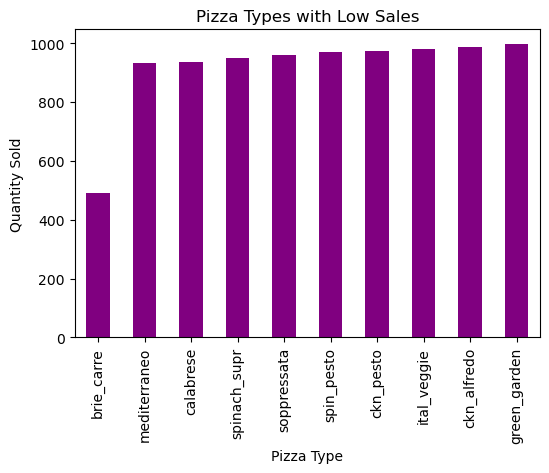

In [42]:
plt.figure(figsize = (6,4))
df3.groupby("pizza_type_id")["quantity"].sum().sort_values().head(10).plot(kind = "bar", color = "purple")
plt.title("Pizza Types with Low Sales")
plt.xlabel("Pizza Type")
plt.ylabel("Quantity Sold")
plt.xticks(rotation = 90)
plt.show()